<a href="https://colab.research.google.com/github/narfdf999/Arquitectura/blob/master/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, Concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import numpy as np


Using TensorFlow backend.


In [0]:
def load_data():
  direcciones_9=np.genfromtxt('09_direcciones.csv',delimiter=',')
  puntos_9=np.genfromtxt('09_puntos.csv',delimiter=',')

  direcciones_10=np.genfromtxt('10_direcciones.csv',delimiter=',')
  puntos_10=np.genfromtxt('10_puntos.csv',delimiter=',')

  direcciones_12=np.genfromtxt('12_direcciones.csv',delimiter=',')
  puntos_12=np.genfromtxt('12_puntos.csv',delimiter=',')

  direcciones_15=np.genfromtxt('15_direcciones.csv',delimiter=',')
  puntos_15=np.genfromtxt('15_puntos.csv',delimiter=',')

  direcciones_17_a=np.genfromtxt('17_a_direcciones.csv',delimiter=',')
  puntos_17_a=np.genfromtxt('17_a_puntos.csv',delimiter=',')

  direcciones_17_b=np.genfromtxt('17_b_direcciones.csv',delimiter=',')
  puntos_17_b=np.genfromtxt('17_b_puntos.csv',delimiter=',')

  direcciones_18=np.genfromtxt('18_direcciones.csv',delimiter=',')
  puntos_18=np.genfromtxt('18_puntos.csv',delimiter=',')

  direcciones_19_a=np.genfromtxt('19a_direcciones.csv',delimiter=',')
  puntos_19_a=np.genfromtxt('19a_puntos.csv',delimiter=',')

  direcciones_19_b=np.genfromtxt('19b_direcciones.csv',delimiter=',')
  puntos_19_b=np.genfromtxt('19b_puntos.csv',delimiter=',')

  direcciones_20_a=np.genfromtxt('20a_direcciones.csv',delimiter=',')
  puntos_20_a=np.genfromtxt('20a_puntos.csv',delimiter=',')

  direcciones_20_b=np.genfromtxt('20b_direcciones.csv',delimiter=',')
  puntos_20_b=np.genfromtxt('20b_puntos.csv',delimiter=',')

  direcciones_21_a=np.genfromtxt('21a_direcciones.csv',delimiter=',')
  puntos_21_a=np.genfromtxt('21a_puntos.csv',delimiter=',')

  direcciones_21_b=np.genfromtxt('21b_direcciones.csv',delimiter=',')
  puntos_21_b=np.genfromtxt('21b_puntos.csv',delimiter=',')

  direcciones_22=np.genfromtxt('22_direcciones.csv',delimiter=',')
  puntos_22=np.genfromtxt('22_puntos.csv',delimiter=',')

  direcciones_23=np.genfromtxt('23_direcciones.csv',delimiter=',')
  puntos_23=np.genfromtxt('23_puntos.csv',delimiter=',')

  direcciones_24=np.genfromtxt('24_direcciones.csv',delimiter=',')
  puntos_24=np.genfromtxt('24_puntos.csv',delimiter=',')

  direcciones_25_a=np.genfromtxt('25a_direcciones.csv',delimiter=',')
  puntos_25_a=np.genfromtxt('25a_puntos.csv',delimiter=',')

  direcciones_25_b=np.genfromtxt('25b_direcciones.csv',delimiter=',')
  puntos_25_b=np.genfromtxt('25b_puntos.csv',delimiter=',')

  direcciones_25_c=np.genfromtxt('25c_direcciones.csv',delimiter=',')
  puntos_25_c=np.genfromtxt('25c_puntos.csv',delimiter=',')

  X_train=np.concatenate((direcciones_9, direcciones_10, direcciones_12, direcciones_15, direcciones_17_a, direcciones_17_b, direcciones_18, direcciones_19_a, direcciones_19_b,  direcciones_20_a, direcciones_20_b,  direcciones_21_a, direcciones_21_b, direcciones_22, direcciones_23,  direcciones_24, direcciones_25_a, direcciones_25_b, direcciones_25_c))
  Y_train=np.concatenate((puntos_9, puntos_10, puntos_12, puntos_15, puntos_17_a, puntos_17_b, puntos_18, puntos_19_a, puntos_19_b, puntos_20_a, puntos_20_b, puntos_21_a, puntos_21_b, puntos_22, puntos_23, puntos_24, puntos_25_a, puntos_25_b, puntos_25_c))
  return [X_train, Y_train]

(X_train,Y_train)=load_data()
print(X_train)


In [0]:

class CGAN():
    def __init__(self):
        # Input shape
        self.distances_size = 1259
        self.num_classes = 4
        self.latent_dim = 128

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(self.num_classes,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=optimizer)
    


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim + self.num_classes))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.distances_size, activation='tanh'))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(self.num_classes,), dtype='float32')
        model_input = Concatenate()([noise, label])

        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(512, input_dim=self.distances_size + self.num_classes))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(64))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=(self.distances_size,))
        label = Input(shape=(self.num_classes,), dtype='float32')

        model_input = Concatenate()([img, label])

        validity = model(model_input)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        #(X_train, y_train), (_, _) = mnist.load_data()
        
        X_train = np.random.random((3000, 1259))
        y_train = np.random.random((3000, 4))

        
        # Configure input
        #X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        #X_train = np.expand_dims(X_train, axis=3)
        #y_train = y_train.reshape(-1, 1)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1)).astype(np.float32)
        fake = np.zeros((batch_size, 1)).astype(np.float32)

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]

            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels])

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels
            sampled_labels = np.random.uniform(0, 1, (batch_size, self.num_classes))
            
            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)
                self.generator.save("generator.h5")
                print("Saved model to disk")

    def sample_images(self, epoch):
        r, c = 2, 5
        noise = np.random.normal(0, 1, (r*c, self.latent_dim))
        sampled_labels = np.random.random((r*c, self.num_classes))

        gen_imgs = self.generator.predict([noise, sampled_labels])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(np.reshape(gen_imgs[cnt, :900], (30, 30)) , cmap='gray')
                #axs[i,j].set_title("Digit: %d" % sampled_labels[cnt])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        #fig.savefig("images/%d.png" % epoch)
        plt.close()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               647168    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'




0 [D loss: 0.795439, acc.: 48.44%] [G loss: 0.908488]


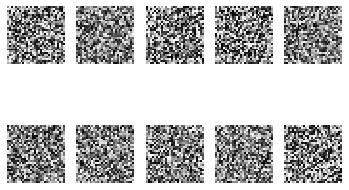

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.490613, acc.: 78.12%] [G loss: 1.070465]
2 [D loss: 0.337772, acc.: 89.06%] [G loss: 0.992049]


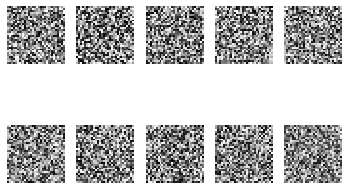

3 [D loss: 0.323548, acc.: 85.94%] [G loss: 1.085506]
4 [D loss: 0.249459, acc.: 96.88%] [G loss: 1.217994]


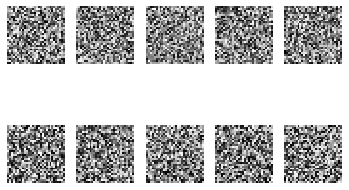

5 [D loss: 0.235991, acc.: 92.19%] [G loss: 1.365874]
6 [D loss: 0.221737, acc.: 93.75%] [G loss: 1.526987]


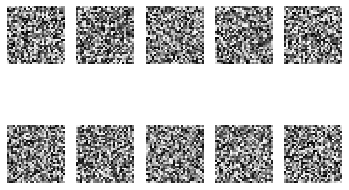

7 [D loss: 0.203287, acc.: 96.88%] [G loss: 1.727697]
8 [D loss: 0.174667, acc.: 92.19%] [G loss: 1.732579]


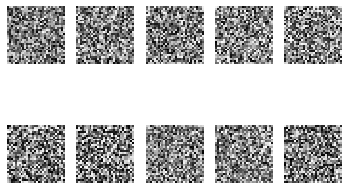

9 [D loss: 0.179190, acc.: 95.31%] [G loss: 1.726172]
10 [D loss: 0.125312, acc.: 98.44%] [G loss: 1.689131]


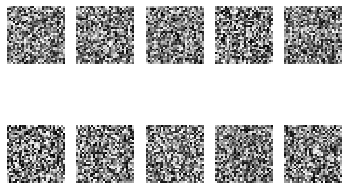

11 [D loss: 0.100433, acc.: 100.00%] [G loss: 1.979042]
12 [D loss: 0.120341, acc.: 100.00%] [G loss: 2.026165]


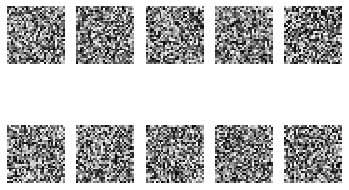

13 [D loss: 0.117723, acc.: 100.00%] [G loss: 1.895149]
14 [D loss: 0.122037, acc.: 98.44%] [G loss: 2.307943]


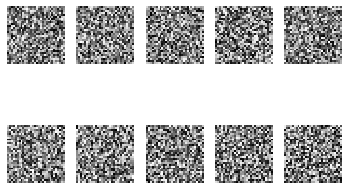

15 [D loss: 0.089200, acc.: 100.00%] [G loss: 2.325150]
16 [D loss: 0.108110, acc.: 98.44%] [G loss: 2.293196]


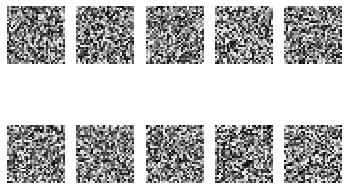

17 [D loss: 0.081071, acc.: 100.00%] [G loss: 2.526341]
18 [D loss: 0.067863, acc.: 100.00%] [G loss: 2.545871]


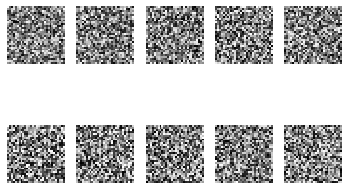

19 [D loss: 0.072868, acc.: 100.00%] [G loss: 2.356088]
20 [D loss: 0.071746, acc.: 100.00%] [G loss: 2.627484]


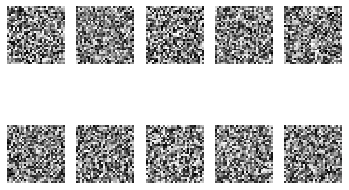

21 [D loss: 0.073467, acc.: 100.00%] [G loss: 2.935307]
22 [D loss: 0.058340, acc.: 100.00%] [G loss: 2.793261]


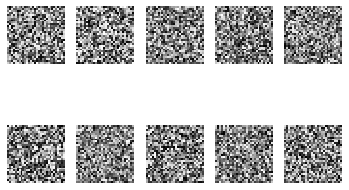

23 [D loss: 0.063758, acc.: 100.00%] [G loss: 2.858443]
24 [D loss: 0.047698, acc.: 100.00%] [G loss: 3.130015]


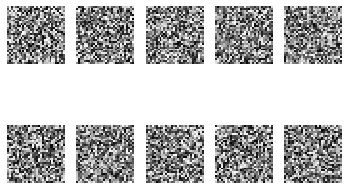

25 [D loss: 0.049457, acc.: 100.00%] [G loss: 2.980372]
26 [D loss: 0.051670, acc.: 100.00%] [G loss: 2.855694]


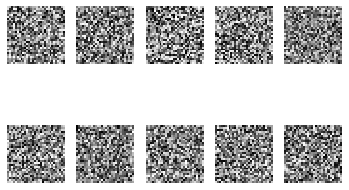

27 [D loss: 0.051206, acc.: 100.00%] [G loss: 2.773311]
28 [D loss: 0.045931, acc.: 100.00%] [G loss: 3.156163]


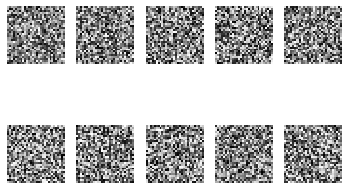

29 [D loss: 0.051037, acc.: 100.00%] [G loss: 3.222109]
30 [D loss: 0.046674, acc.: 100.00%] [G loss: 3.226455]


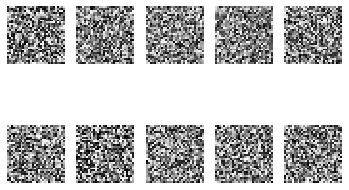

31 [D loss: 0.028566, acc.: 100.00%] [G loss: 3.317834]
32 [D loss: 0.041806, acc.: 100.00%] [G loss: 3.453429]


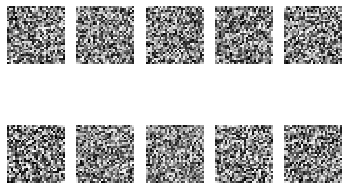

33 [D loss: 0.043905, acc.: 100.00%] [G loss: 3.252848]
34 [D loss: 0.026931, acc.: 100.00%] [G loss: 3.434811]


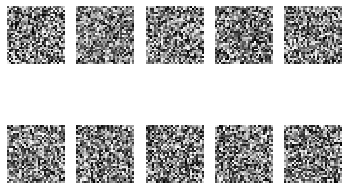

35 [D loss: 0.043835, acc.: 100.00%] [G loss: 3.271845]
36 [D loss: 0.048346, acc.: 100.00%] [G loss: 3.666461]


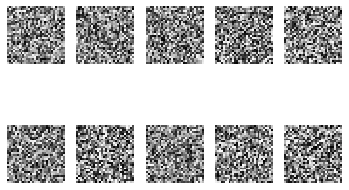

37 [D loss: 0.039863, acc.: 100.00%] [G loss: 3.915761]
38 [D loss: 0.031342, acc.: 100.00%] [G loss: 3.710067]


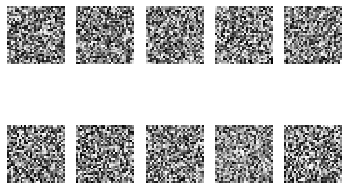

39 [D loss: 0.036834, acc.: 100.00%] [G loss: 3.778004]
40 [D loss: 0.035770, acc.: 100.00%] [G loss: 3.766680]


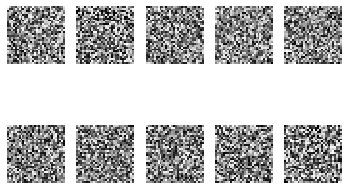

41 [D loss: 0.022846, acc.: 100.00%] [G loss: 3.964279]
42 [D loss: 0.029689, acc.: 100.00%] [G loss: 4.066758]


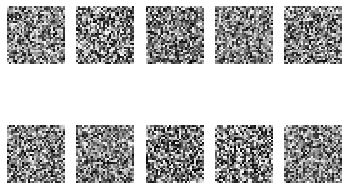

43 [D loss: 0.027107, acc.: 100.00%] [G loss: 3.531862]
44 [D loss: 0.024725, acc.: 100.00%] [G loss: 3.901611]


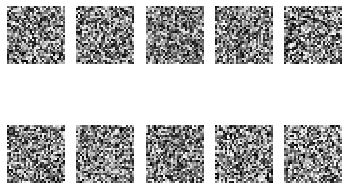

45 [D loss: 0.023459, acc.: 100.00%] [G loss: 3.789880]
46 [D loss: 0.027153, acc.: 100.00%] [G loss: 4.101048]


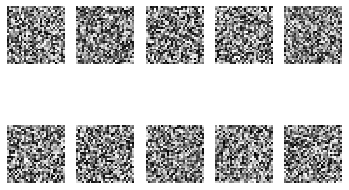

47 [D loss: 0.027081, acc.: 100.00%] [G loss: 3.882286]
48 [D loss: 0.025182, acc.: 100.00%] [G loss: 3.904104]


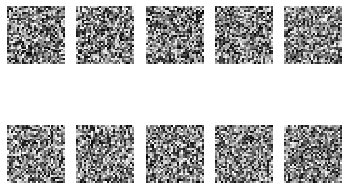

49 [D loss: 0.037948, acc.: 100.00%] [G loss: 3.732852]
50 [D loss: 0.032859, acc.: 100.00%] [G loss: 4.016235]


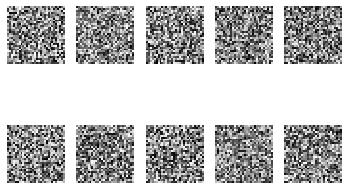

51 [D loss: 0.035342, acc.: 100.00%] [G loss: 4.156039]
52 [D loss: 0.018252, acc.: 100.00%] [G loss: 4.662559]


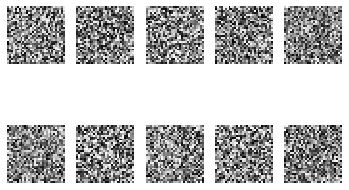

53 [D loss: 0.022051, acc.: 100.00%] [G loss: 3.823203]
54 [D loss: 0.015051, acc.: 100.00%] [G loss: 4.261938]


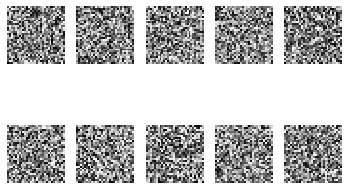

55 [D loss: 0.021869, acc.: 100.00%] [G loss: 4.629535]
56 [D loss: 0.021041, acc.: 100.00%] [G loss: 4.322909]


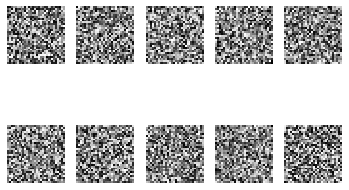

57 [D loss: 0.016777, acc.: 100.00%] [G loss: 4.339074]
58 [D loss: 0.016823, acc.: 100.00%] [G loss: 4.270096]


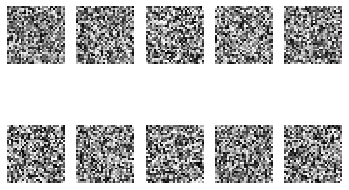

59 [D loss: 0.036331, acc.: 98.44%] [G loss: 4.264978]
60 [D loss: 0.022154, acc.: 100.00%] [G loss: 4.455862]


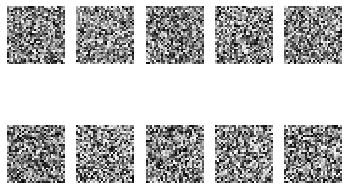

61 [D loss: 0.027368, acc.: 100.00%] [G loss: 4.617325]
62 [D loss: 0.014687, acc.: 100.00%] [G loss: 4.482510]


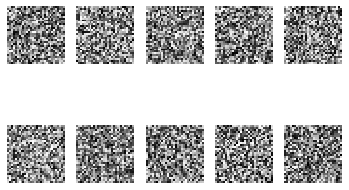

63 [D loss: 0.024502, acc.: 100.00%] [G loss: 4.256527]
64 [D loss: 0.017516, acc.: 100.00%] [G loss: 4.845078]


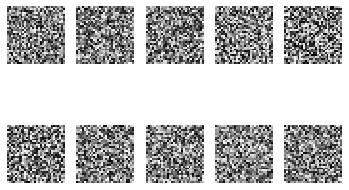

65 [D loss: 0.019134, acc.: 100.00%] [G loss: 4.588148]
66 [D loss: 0.016508, acc.: 100.00%] [G loss: 4.483090]


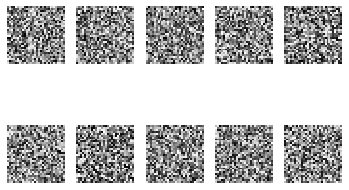

67 [D loss: 0.021592, acc.: 100.00%] [G loss: 4.459961]
68 [D loss: 0.025260, acc.: 100.00%] [G loss: 4.497993]


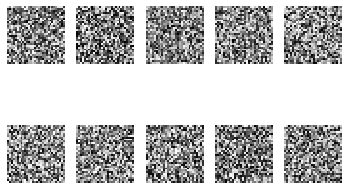

69 [D loss: 0.035692, acc.: 98.44%] [G loss: 4.567374]
70 [D loss: 0.011976, acc.: 100.00%] [G loss: 4.634989]


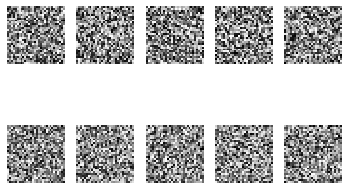

71 [D loss: 0.013944, acc.: 100.00%] [G loss: 4.934645]
72 [D loss: 0.010878, acc.: 100.00%] [G loss: 4.531356]


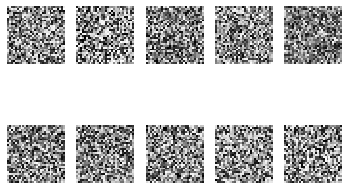

73 [D loss: 0.016264, acc.: 100.00%] [G loss: 4.914135]
74 [D loss: 0.030373, acc.: 98.44%] [G loss: 4.752227]


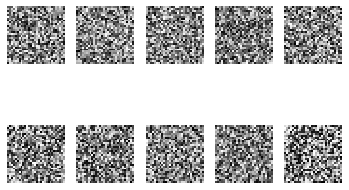

75 [D loss: 0.014594, acc.: 100.00%] [G loss: 5.281165]
76 [D loss: 0.008232, acc.: 100.00%] [G loss: 5.169898]


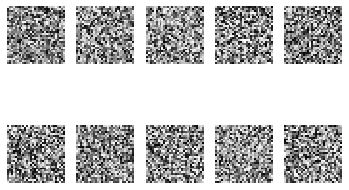

77 [D loss: 0.010636, acc.: 100.00%] [G loss: 5.380703]
78 [D loss: 0.011184, acc.: 100.00%] [G loss: 4.951316]


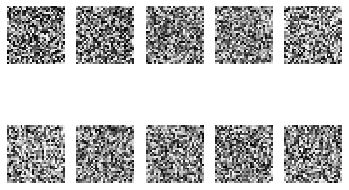

79 [D loss: 0.012817, acc.: 100.00%] [G loss: 5.051899]
80 [D loss: 0.035621, acc.: 98.44%] [G loss: 4.697748]


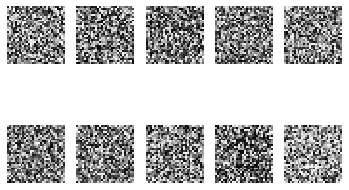

81 [D loss: 0.007040, acc.: 100.00%] [G loss: 4.707544]
82 [D loss: 0.013332, acc.: 100.00%] [G loss: 5.117256]


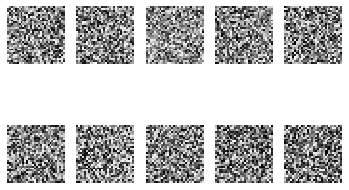

83 [D loss: 0.015083, acc.: 100.00%] [G loss: 5.326307]
84 [D loss: 0.010764, acc.: 100.00%] [G loss: 4.879478]


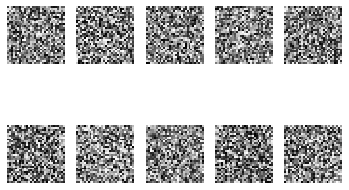

85 [D loss: 0.015882, acc.: 100.00%] [G loss: 4.393796]
86 [D loss: 0.013853, acc.: 100.00%] [G loss: 5.654278]


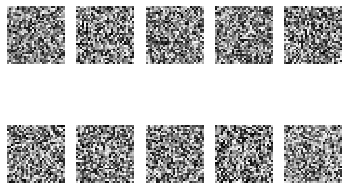

87 [D loss: 0.014866, acc.: 100.00%] [G loss: 5.044510]
88 [D loss: 0.015096, acc.: 100.00%] [G loss: 5.118812]


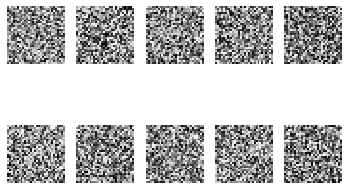

89 [D loss: 0.009366, acc.: 100.00%] [G loss: 5.223577]
90 [D loss: 0.019392, acc.: 100.00%] [G loss: 5.315854]


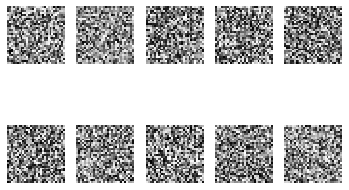

91 [D loss: 0.011474, acc.: 100.00%] [G loss: 4.730309]
92 [D loss: 0.016220, acc.: 100.00%] [G loss: 5.221923]


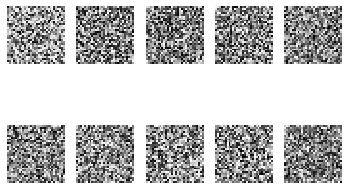

93 [D loss: 0.024191, acc.: 100.00%] [G loss: 5.759353]
94 [D loss: 0.010958, acc.: 100.00%] [G loss: 5.614087]


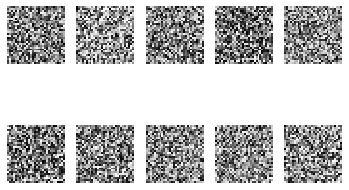

95 [D loss: 0.010388, acc.: 100.00%] [G loss: 5.289906]
96 [D loss: 0.012245, acc.: 100.00%] [G loss: 5.177659]


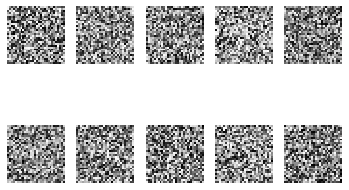

97 [D loss: 0.018909, acc.: 100.00%] [G loss: 5.493235]
98 [D loss: 0.017347, acc.: 100.00%] [G loss: 6.002622]


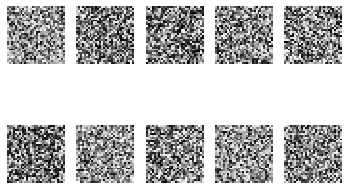

99 [D loss: 0.018094, acc.: 100.00%] [G loss: 5.182227]
100 [D loss: 0.009087, acc.: 100.00%] [G loss: 5.958414]


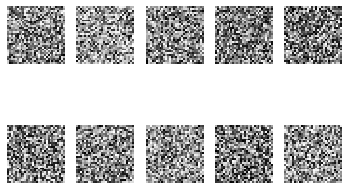

101 [D loss: 0.015260, acc.: 100.00%] [G loss: 5.848880]
102 [D loss: 0.005934, acc.: 100.00%] [G loss: 5.779071]


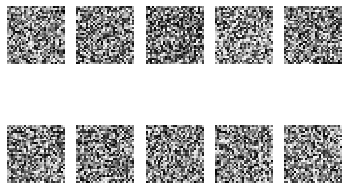

103 [D loss: 0.008334, acc.: 100.00%] [G loss: 5.592183]
104 [D loss: 0.007911, acc.: 100.00%] [G loss: 5.759347]


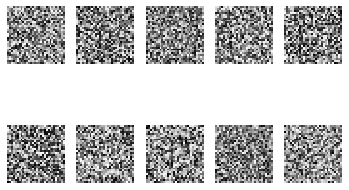

105 [D loss: 0.009373, acc.: 100.00%] [G loss: 5.505003]
106 [D loss: 0.011313, acc.: 100.00%] [G loss: 5.530461]


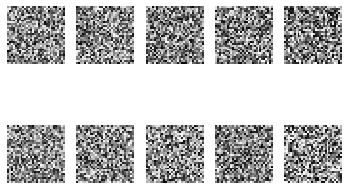

107 [D loss: 0.007799, acc.: 100.00%] [G loss: 5.865553]
108 [D loss: 0.006964, acc.: 100.00%] [G loss: 5.356905]


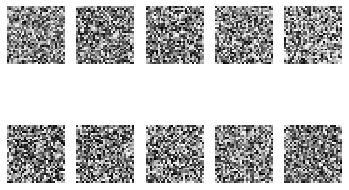

109 [D loss: 0.009405, acc.: 100.00%] [G loss: 5.417181]
110 [D loss: 0.010020, acc.: 100.00%] [G loss: 5.643768]


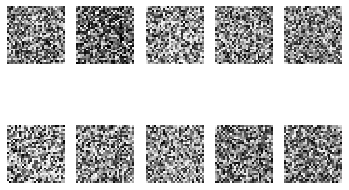

111 [D loss: 0.007218, acc.: 100.00%] [G loss: 6.121093]
112 [D loss: 0.010537, acc.: 100.00%] [G loss: 5.684512]


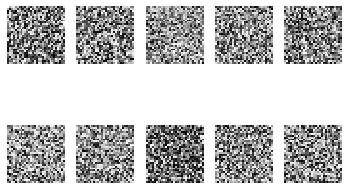

113 [D loss: 0.011731, acc.: 100.00%] [G loss: 5.133401]
114 [D loss: 0.020253, acc.: 100.00%] [G loss: 5.437267]


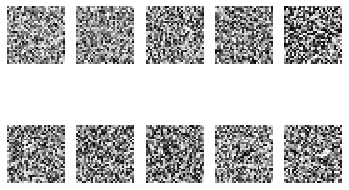

115 [D loss: 0.018049, acc.: 100.00%] [G loss: 6.575953]
116 [D loss: 0.006563, acc.: 100.00%] [G loss: 5.979874]


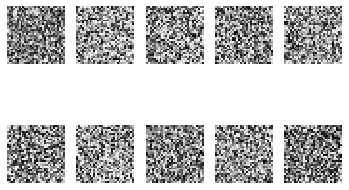

117 [D loss: 0.035028, acc.: 98.44%] [G loss: 5.348685]
118 [D loss: 0.022538, acc.: 100.00%] [G loss: 4.852911]


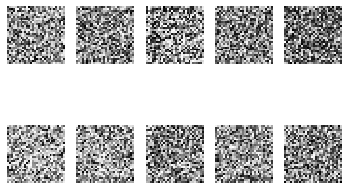

119 [D loss: 0.015961, acc.: 100.00%] [G loss: 5.622811]
120 [D loss: 0.016729, acc.: 100.00%] [G loss: 6.222647]


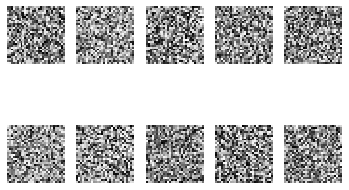

121 [D loss: 0.008912, acc.: 100.00%] [G loss: 6.612181]
122 [D loss: 0.012553, acc.: 100.00%] [G loss: 6.641824]


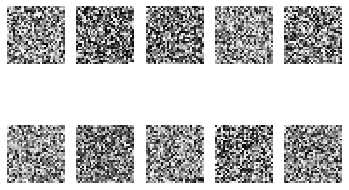

123 [D loss: 0.014927, acc.: 100.00%] [G loss: 7.058231]
124 [D loss: 0.011363, acc.: 100.00%] [G loss: 5.979095]


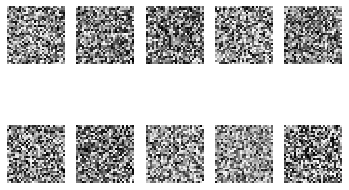

125 [D loss: 0.004000, acc.: 100.00%] [G loss: 6.344361]
126 [D loss: 0.031848, acc.: 98.44%] [G loss: 6.549892]


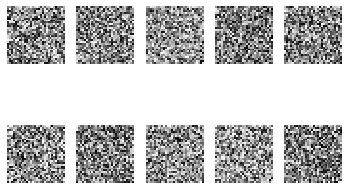

127 [D loss: 0.010203, acc.: 100.00%] [G loss: 6.156375]
128 [D loss: 0.026446, acc.: 100.00%] [G loss: 6.786885]


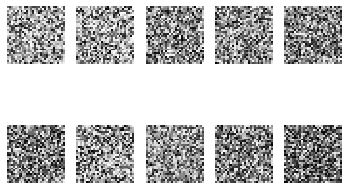

129 [D loss: 0.014964, acc.: 100.00%] [G loss: 6.526079]
130 [D loss: 0.005794, acc.: 100.00%] [G loss: 6.922926]


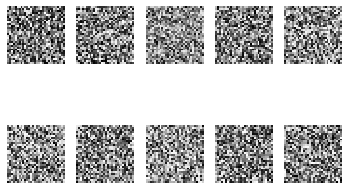

131 [D loss: 0.007263, acc.: 100.00%] [G loss: 7.003584]
132 [D loss: 0.011691, acc.: 100.00%] [G loss: 6.758574]


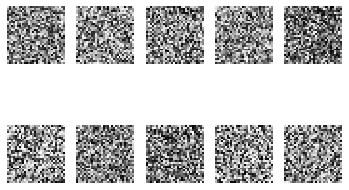

133 [D loss: 0.019117, acc.: 100.00%] [G loss: 6.288139]
134 [D loss: 0.004624, acc.: 100.00%] [G loss: 6.727898]


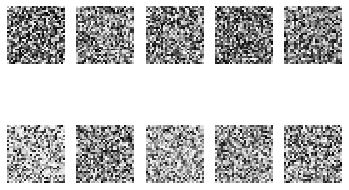

135 [D loss: 0.068431, acc.: 98.44%] [G loss: 6.290285]
136 [D loss: 0.023738, acc.: 98.44%] [G loss: 7.225110]


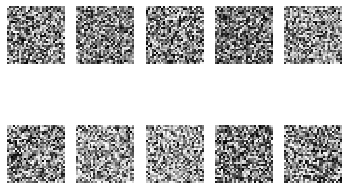

137 [D loss: 0.088353, acc.: 98.44%] [G loss: 5.244842]
138 [D loss: 0.006807, acc.: 100.00%] [G loss: 6.323861]


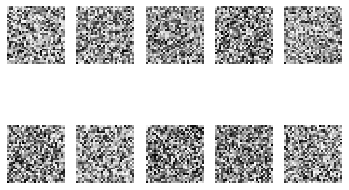

139 [D loss: 0.021795, acc.: 100.00%] [G loss: 6.620585]
140 [D loss: 0.071892, acc.: 98.44%] [G loss: 7.900237]


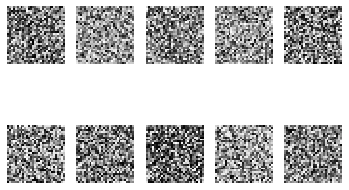

141 [D loss: 0.532107, acc.: 78.12%] [G loss: 3.792454]
142 [D loss: 0.383522, acc.: 84.38%] [G loss: 5.070191]


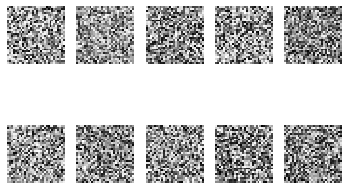

143 [D loss: 0.035962, acc.: 100.00%] [G loss: 6.655410]
144 [D loss: 0.133976, acc.: 95.31%] [G loss: 4.801811]


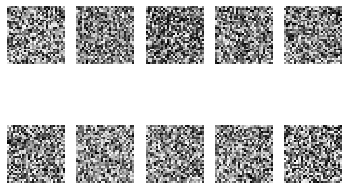

145 [D loss: 0.098449, acc.: 95.31%] [G loss: 5.505021]
146 [D loss: 0.026979, acc.: 100.00%] [G loss: 6.320629]


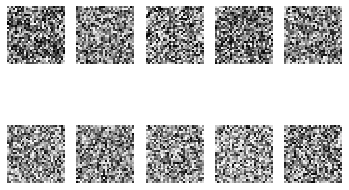

147 [D loss: 0.017374, acc.: 100.00%] [G loss: 6.595574]
148 [D loss: 0.053659, acc.: 98.44%] [G loss: 5.068861]


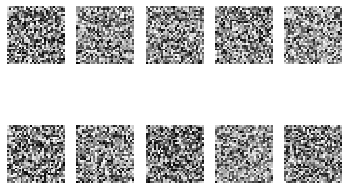

149 [D loss: 0.048761, acc.: 96.88%] [G loss: 4.866149]
150 [D loss: 0.073668, acc.: 95.31%] [G loss: 5.214242]


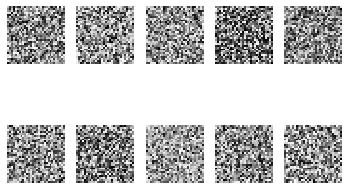

151 [D loss: 0.039936, acc.: 100.00%] [G loss: 6.714155]
152 [D loss: 0.058148, acc.: 96.88%] [G loss: 5.775103]


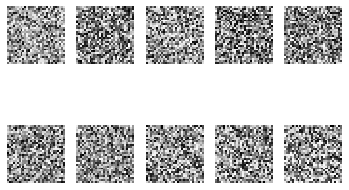

153 [D loss: 0.078804, acc.: 95.31%] [G loss: 6.079593]
154 [D loss: 0.091171, acc.: 96.88%] [G loss: 4.821738]


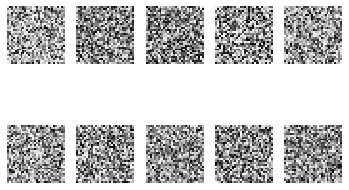

155 [D loss: 0.096903, acc.: 95.31%] [G loss: 5.766942]
156 [D loss: 0.012196, acc.: 100.00%] [G loss: 6.444693]


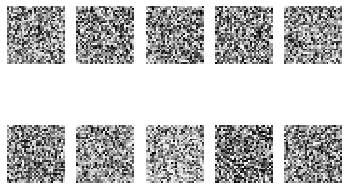

157 [D loss: 0.136055, acc.: 93.75%] [G loss: 5.816483]
158 [D loss: 0.026960, acc.: 100.00%] [G loss: 6.226698]


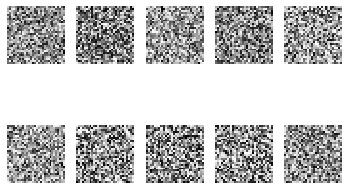

159 [D loss: 0.115672, acc.: 96.88%] [G loss: 5.322908]
160 [D loss: 0.036941, acc.: 98.44%] [G loss: 6.006100]


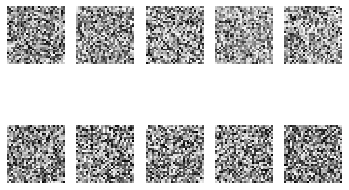

161 [D loss: 0.050403, acc.: 100.00%] [G loss: 6.305429]
162 [D loss: 0.089037, acc.: 96.88%] [G loss: 5.994199]


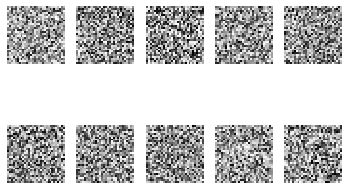

163 [D loss: 0.042742, acc.: 98.44%] [G loss: 7.051519]
164 [D loss: 0.488158, acc.: 81.25%] [G loss: 5.179777]


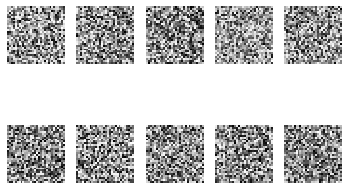

165 [D loss: 0.134331, acc.: 96.88%] [G loss: 7.092582]
166 [D loss: 0.960835, acc.: 59.38%] [G loss: 2.166653]


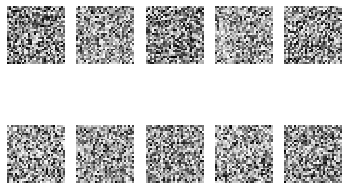

167 [D loss: 0.721450, acc.: 71.88%] [G loss: 2.216732]
168 [D loss: 0.552849, acc.: 78.12%] [G loss: 3.470227]


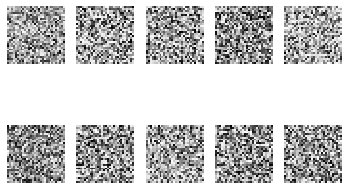

169 [D loss: 0.140582, acc.: 93.75%] [G loss: 5.690272]
170 [D loss: 0.191083, acc.: 93.75%] [G loss: 4.502370]


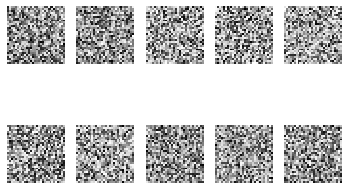

171 [D loss: 0.075297, acc.: 100.00%] [G loss: 5.059879]
172 [D loss: 0.101078, acc.: 96.88%] [G loss: 4.852880]


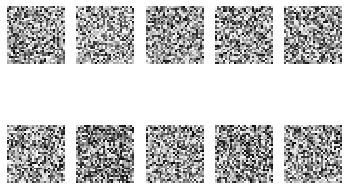

173 [D loss: 0.074997, acc.: 96.88%] [G loss: 5.456064]
174 [D loss: 0.115560, acc.: 98.44%] [G loss: 5.856693]


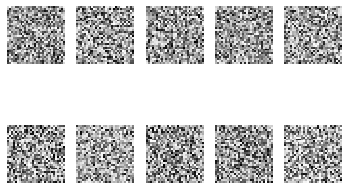

175 [D loss: 0.082147, acc.: 100.00%] [G loss: 5.577225]
176 [D loss: 0.088746, acc.: 96.88%] [G loss: 5.288368]


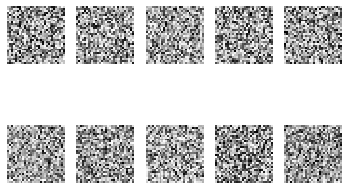

177 [D loss: 0.140688, acc.: 96.88%] [G loss: 4.679492]
178 [D loss: 0.110690, acc.: 96.88%] [G loss: 5.273340]


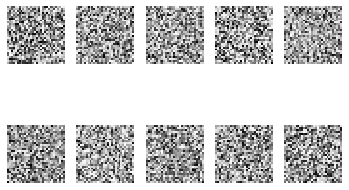

179 [D loss: 0.102772, acc.: 96.88%] [G loss: 5.026864]
180 [D loss: 0.139960, acc.: 93.75%] [G loss: 5.011593]


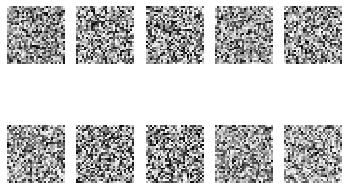

181 [D loss: 0.094624, acc.: 96.88%] [G loss: 5.156740]
182 [D loss: 0.332706, acc.: 89.06%] [G loss: 3.025221]


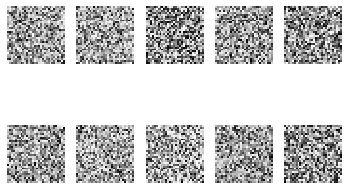

183 [D loss: 0.168616, acc.: 90.62%] [G loss: 4.500678]
184 [D loss: 0.085035, acc.: 100.00%] [G loss: 5.642203]


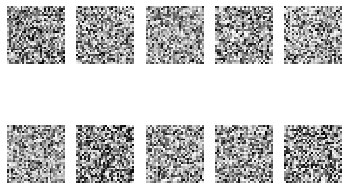

185 [D loss: 0.316790, acc.: 85.94%] [G loss: 4.208959]
186 [D loss: 0.160552, acc.: 90.62%] [G loss: 5.705325]


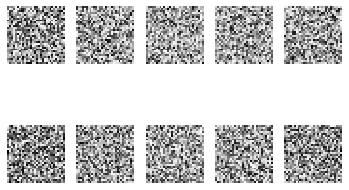

187 [D loss: 0.130461, acc.: 96.88%] [G loss: 5.711788]
188 [D loss: 0.053335, acc.: 100.00%] [G loss: 5.549910]


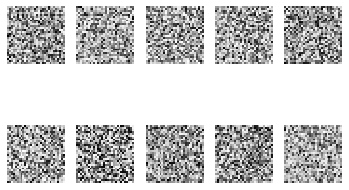

189 [D loss: 0.051529, acc.: 100.00%] [G loss: 5.119295]
190 [D loss: 0.135687, acc.: 93.75%] [G loss: 5.860209]


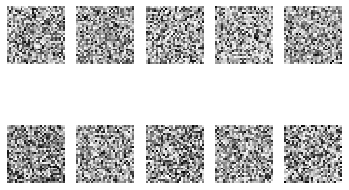

191 [D loss: 0.150347, acc.: 93.75%] [G loss: 5.371719]
192 [D loss: 0.194576, acc.: 93.75%] [G loss: 5.531443]


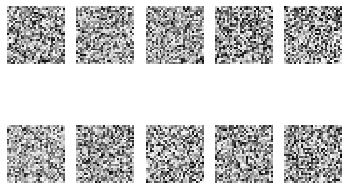

193 [D loss: 0.502460, acc.: 76.56%] [G loss: 4.775631]
194 [D loss: 0.085946, acc.: 93.75%] [G loss: 6.775115]


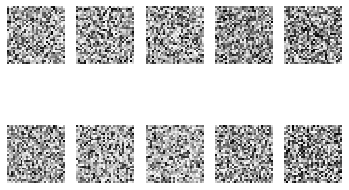

195 [D loss: 0.548885, acc.: 78.12%] [G loss: 4.122601]
196 [D loss: 0.147191, acc.: 92.19%] [G loss: 6.340906]


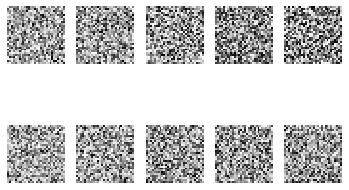

197 [D loss: 0.296359, acc.: 90.62%] [G loss: 5.915397]
198 [D loss: 0.147989, acc.: 96.88%] [G loss: 5.871528]


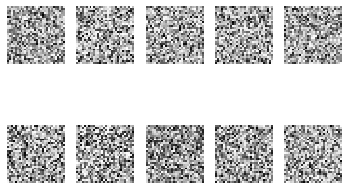

199 [D loss: 0.086296, acc.: 98.44%] [G loss: 6.514366]
200 [D loss: 0.197551, acc.: 93.75%] [G loss: 3.453248]


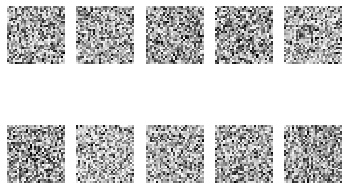

201 [D loss: 0.285543, acc.: 82.81%] [G loss: 7.429163]
202 [D loss: 0.103332, acc.: 98.44%] [G loss: 6.540898]


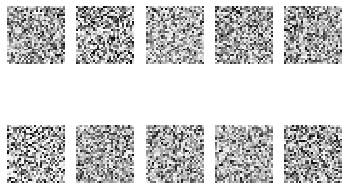

203 [D loss: 0.381029, acc.: 81.25%] [G loss: 4.575840]
204 [D loss: 0.102338, acc.: 95.31%] [G loss: 6.822712]


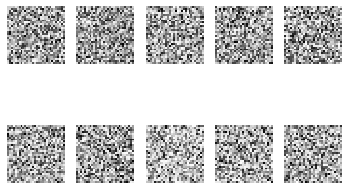

205 [D loss: 0.422506, acc.: 81.25%] [G loss: 4.143104]
206 [D loss: 0.087553, acc.: 98.44%] [G loss: 5.669922]


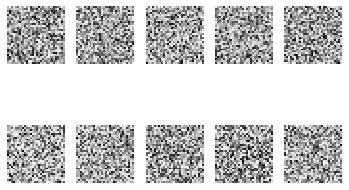

207 [D loss: 0.165198, acc.: 95.31%] [G loss: 6.687172]
208 [D loss: 0.217472, acc.: 90.62%] [G loss: 4.821053]


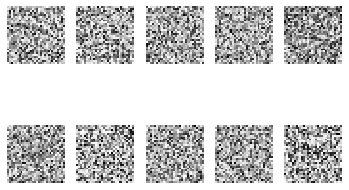

209 [D loss: 0.081541, acc.: 96.88%] [G loss: 5.879589]
210 [D loss: 0.126587, acc.: 98.44%] [G loss: 4.936925]


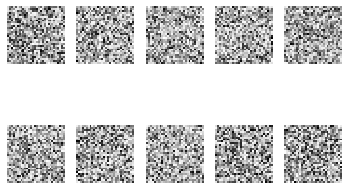

211 [D loss: 0.069530, acc.: 98.44%] [G loss: 5.693117]
212 [D loss: 0.192398, acc.: 95.31%] [G loss: 5.672670]


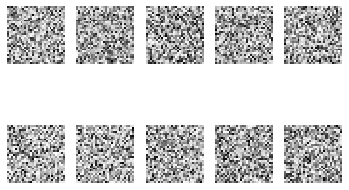

213 [D loss: 0.163045, acc.: 93.75%] [G loss: 4.330396]
214 [D loss: 0.062776, acc.: 98.44%] [G loss: 5.811682]


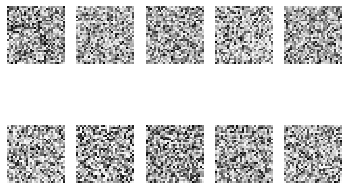

215 [D loss: 0.280669, acc.: 85.94%] [G loss: 5.391434]
216 [D loss: 0.095696, acc.: 100.00%] [G loss: 7.198841]


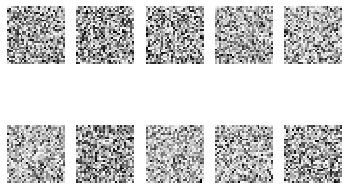

217 [D loss: 1.238416, acc.: 46.88%] [G loss: 1.445866]
218 [D loss: 0.519324, acc.: 73.44%] [G loss: 4.660817]


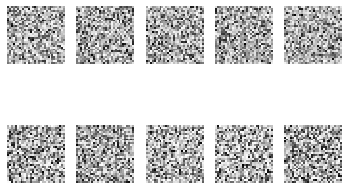

219 [D loss: 0.588752, acc.: 67.19%] [G loss: 3.952876]
220 [D loss: 0.134290, acc.: 95.31%] [G loss: 5.296238]


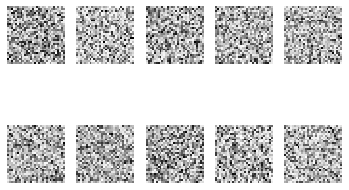

221 [D loss: 0.264826, acc.: 93.75%] [G loss: 4.081323]
222 [D loss: 0.153299, acc.: 93.75%] [G loss: 5.664747]


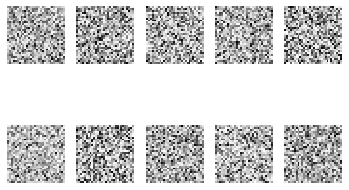

223 [D loss: 0.252279, acc.: 92.19%] [G loss: 3.378571]
224 [D loss: 0.074751, acc.: 100.00%] [G loss: 4.819543]


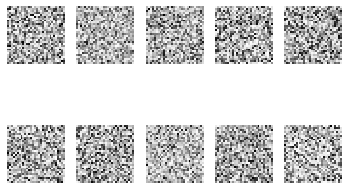

225 [D loss: 0.188010, acc.: 95.31%] [G loss: 5.219598]
226 [D loss: 0.251994, acc.: 89.06%] [G loss: 5.855282]


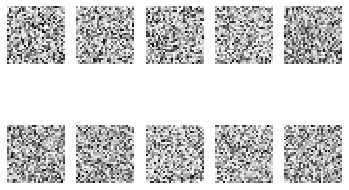

227 [D loss: 0.983016, acc.: 53.12%] [G loss: 2.345764]
228 [D loss: 0.155568, acc.: 93.75%] [G loss: 4.741801]


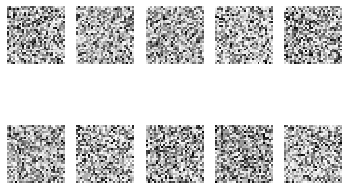

229 [D loss: 0.882322, acc.: 51.56%] [G loss: 1.945848]
230 [D loss: 0.350075, acc.: 78.12%] [G loss: 4.235481]


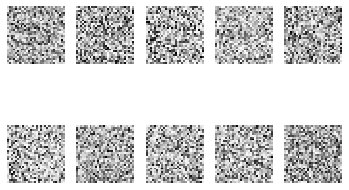

231 [D loss: 0.303060, acc.: 89.06%] [G loss: 3.520225]
232 [D loss: 0.217169, acc.: 95.31%] [G loss: 5.313479]


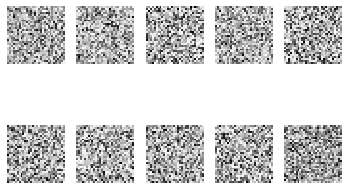

233 [D loss: 0.349111, acc.: 87.50%] [G loss: 2.686301]
234 [D loss: 0.195757, acc.: 90.62%] [G loss: 5.591017]


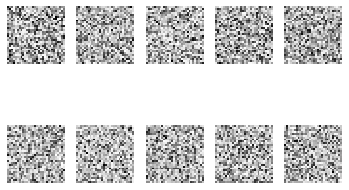

235 [D loss: 0.710246, acc.: 62.50%] [G loss: 2.254531]
236 [D loss: 0.229396, acc.: 93.75%] [G loss: 6.593477]


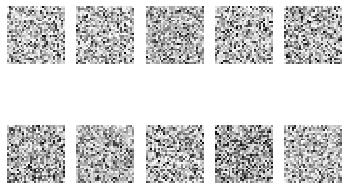

237 [D loss: 2.437503, acc.: 1.56%] [G loss: 0.248948]
238 [D loss: 1.144292, acc.: 51.56%] [G loss: 0.675500]


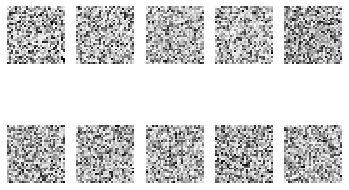

239 [D loss: 0.396019, acc.: 79.69%] [G loss: 1.801943]
240 [D loss: 0.670779, acc.: 57.81%] [G loss: 1.285978]


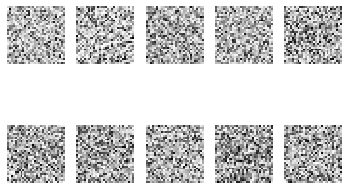

241 [D loss: 0.516824, acc.: 71.88%] [G loss: 1.433146]
242 [D loss: 0.480574, acc.: 79.69%] [G loss: 1.826186]


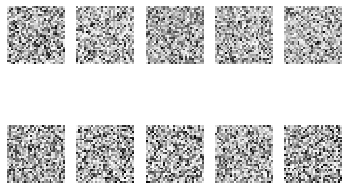

243 [D loss: 0.428906, acc.: 90.62%] [G loss: 2.001581]
244 [D loss: 0.504700, acc.: 76.56%] [G loss: 2.203526]


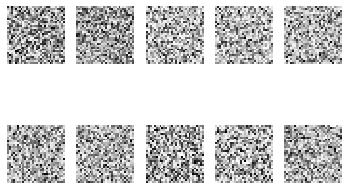

245 [D loss: 0.421289, acc.: 81.25%] [G loss: 2.372849]
246 [D loss: 0.493805, acc.: 84.38%] [G loss: 1.796548]


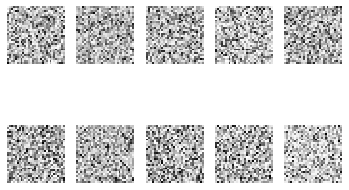

247 [D loss: 0.433597, acc.: 82.81%] [G loss: 2.703776]
248 [D loss: 0.700005, acc.: 57.81%] [G loss: 1.781991]


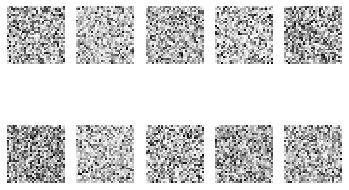

249 [D loss: 0.386454, acc.: 87.50%] [G loss: 2.632416]
250 [D loss: 0.505288, acc.: 79.69%] [G loss: 1.947330]


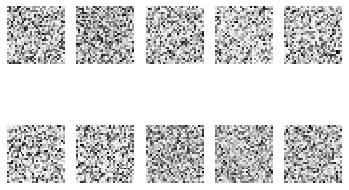

251 [D loss: 0.481880, acc.: 73.44%] [G loss: 3.181920]
252 [D loss: 0.998066, acc.: 42.19%] [G loss: 0.876263]


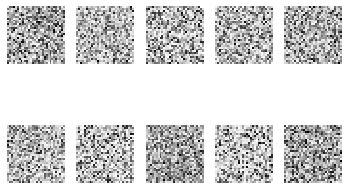

253 [D loss: 0.522987, acc.: 75.00%] [G loss: 1.620729]
254 [D loss: 0.441273, acc.: 79.69%] [G loss: 2.870022]


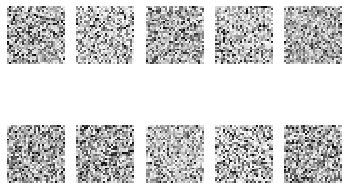

255 [D loss: 0.869108, acc.: 31.25%] [G loss: 0.997010]
256 [D loss: 0.498634, acc.: 79.69%] [G loss: 1.533153]


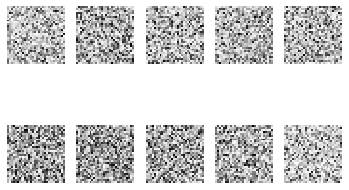

257 [D loss: 0.498626, acc.: 79.69%] [G loss: 2.129000]
258 [D loss: 0.584283, acc.: 67.19%] [G loss: 1.775825]


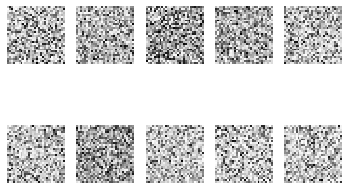

259 [D loss: 0.565024, acc.: 71.88%] [G loss: 1.894086]
260 [D loss: 0.578834, acc.: 68.75%] [G loss: 2.175520]


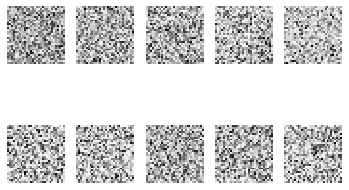

261 [D loss: 0.743267, acc.: 54.69%] [G loss: 1.331512]
262 [D loss: 0.512534, acc.: 76.56%] [G loss: 1.525537]


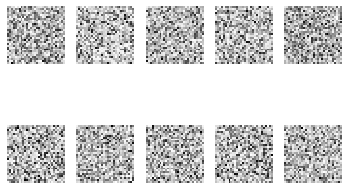

263 [D loss: 0.589474, acc.: 67.19%] [G loss: 1.893230]
264 [D loss: 0.710871, acc.: 57.81%] [G loss: 1.509312]


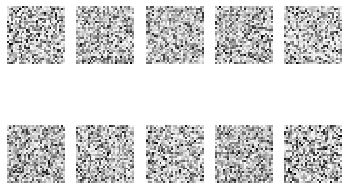

265 [D loss: 0.578892, acc.: 71.88%] [G loss: 1.962065]
266 [D loss: 0.682582, acc.: 56.25%] [G loss: 1.261369]


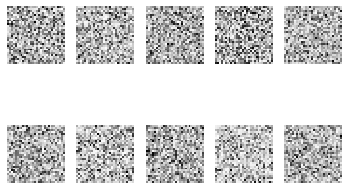

267 [D loss: 0.659047, acc.: 64.06%] [G loss: 1.658288]
268 [D loss: 0.549683, acc.: 73.44%] [G loss: 1.417443]


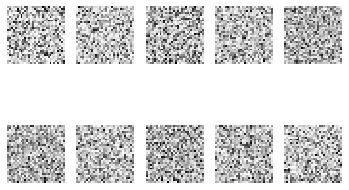

269 [D loss: 0.664613, acc.: 71.88%] [G loss: 1.933884]
270 [D loss: 0.862360, acc.: 43.75%] [G loss: 1.061415]


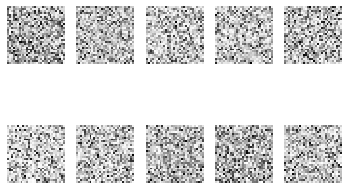

271 [D loss: 0.601996, acc.: 68.75%] [G loss: 1.411354]
272 [D loss: 0.648711, acc.: 67.19%] [G loss: 1.376280]


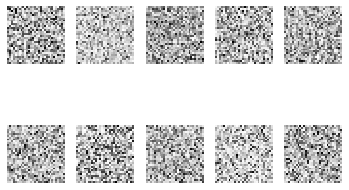

273 [D loss: 0.760410, acc.: 48.44%] [G loss: 1.169584]
274 [D loss: 0.614345, acc.: 70.31%] [G loss: 1.694215]


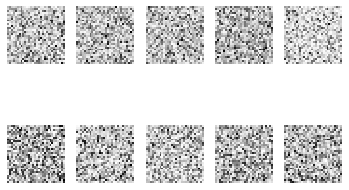

275 [D loss: 0.667253, acc.: 60.94%] [G loss: 1.260759]
276 [D loss: 0.650807, acc.: 64.06%] [G loss: 1.310332]


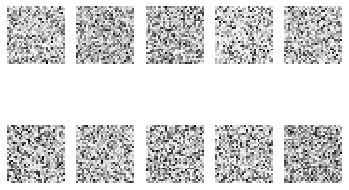

277 [D loss: 0.679634, acc.: 62.50%] [G loss: 1.548441]
278 [D loss: 0.729868, acc.: 51.56%] [G loss: 1.115969]


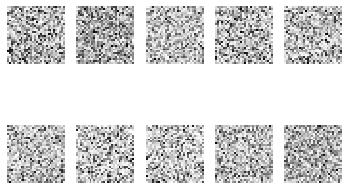

279 [D loss: 0.615867, acc.: 68.75%] [G loss: 1.365041]
280 [D loss: 0.629579, acc.: 67.19%] [G loss: 1.300710]


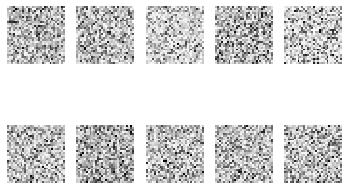

281 [D loss: 0.684664, acc.: 60.94%] [G loss: 1.070159]
282 [D loss: 0.641744, acc.: 62.50%] [G loss: 1.265849]


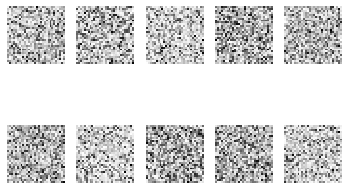

283 [D loss: 0.590734, acc.: 71.88%] [G loss: 1.400408]
284 [D loss: 0.832137, acc.: 34.38%] [G loss: 0.883963]


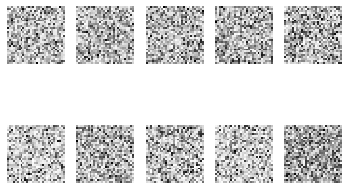

285 [D loss: 0.590628, acc.: 67.19%] [G loss: 1.195624]
286 [D loss: 0.703979, acc.: 53.12%] [G loss: 1.107707]


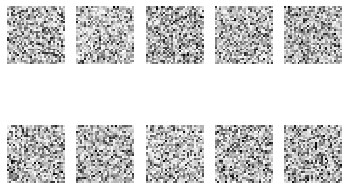

287 [D loss: 0.705637, acc.: 60.94%] [G loss: 1.259685]
288 [D loss: 0.692922, acc.: 57.81%] [G loss: 1.576859]


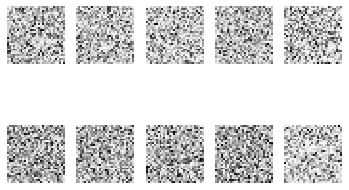

289 [D loss: 0.753439, acc.: 43.75%] [G loss: 0.881692]
290 [D loss: 0.660769, acc.: 59.38%] [G loss: 0.961033]


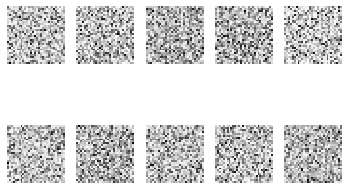

291 [D loss: 0.637979, acc.: 59.38%] [G loss: 1.321056]
292 [D loss: 0.806768, acc.: 34.38%] [G loss: 0.929621]


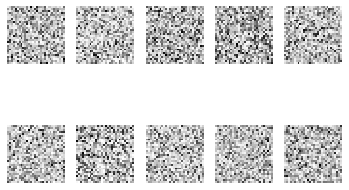

293 [D loss: 0.675600, acc.: 68.75%] [G loss: 1.272518]
294 [D loss: 0.650898, acc.: 57.81%] [G loss: 1.150735]


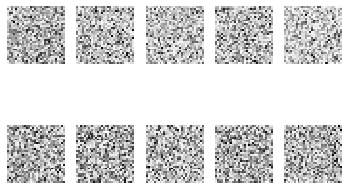

295 [D loss: 0.779571, acc.: 42.19%] [G loss: 0.900202]
296 [D loss: 0.674689, acc.: 54.69%] [G loss: 1.158411]


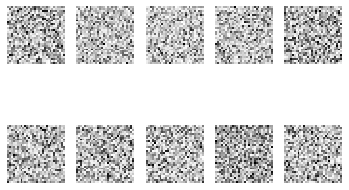

297 [D loss: 0.656120, acc.: 64.06%] [G loss: 1.159052]
298 [D loss: 0.830771, acc.: 32.81%] [G loss: 0.855968]


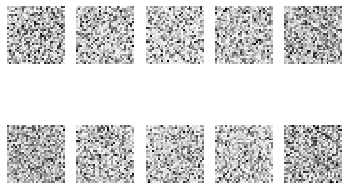

299 [D loss: 0.711587, acc.: 56.25%] [G loss: 1.015118]
300 [D loss: 0.618751, acc.: 65.62%] [G loss: 1.228866]


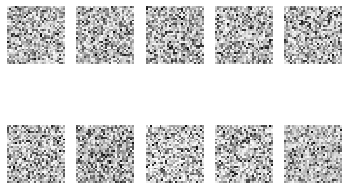

301 [D loss: 0.699888, acc.: 50.00%] [G loss: 1.016401]
302 [D loss: 0.681701, acc.: 56.25%] [G loss: 1.067096]


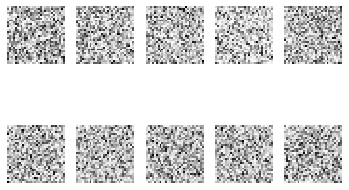

303 [D loss: 0.656432, acc.: 65.62%] [G loss: 1.315969]
304 [D loss: 0.775762, acc.: 42.19%] [G loss: 0.916781]


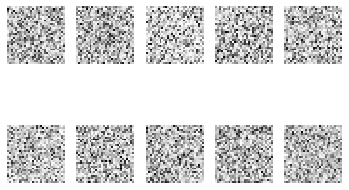

305 [D loss: 0.635107, acc.: 59.38%] [G loss: 0.958194]
306 [D loss: 0.712911, acc.: 48.44%] [G loss: 0.991923]


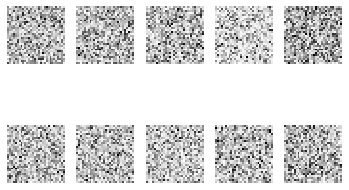

307 [D loss: 0.643040, acc.: 62.50%] [G loss: 0.957081]
308 [D loss: 0.662868, acc.: 60.94%] [G loss: 1.194562]


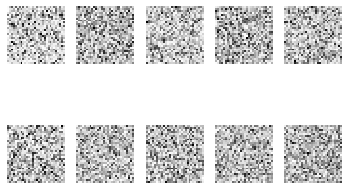

309 [D loss: 0.729393, acc.: 48.44%] [G loss: 0.905864]
310 [D loss: 0.641398, acc.: 67.19%] [G loss: 0.930526]


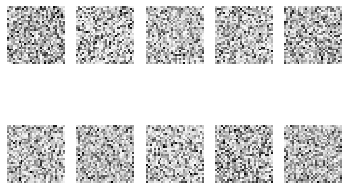

311 [D loss: 0.667406, acc.: 60.94%] [G loss: 0.929833]
312 [D loss: 0.719111, acc.: 51.56%] [G loss: 1.056064]


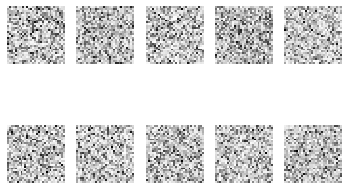

313 [D loss: 0.665874, acc.: 57.81%] [G loss: 1.110589]
314 [D loss: 0.663878, acc.: 57.81%] [G loss: 1.000727]


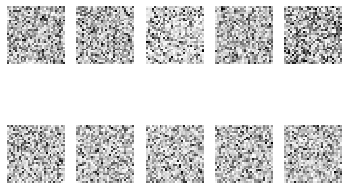

315 [D loss: 0.701717, acc.: 51.56%] [G loss: 0.953738]
316 [D loss: 0.686331, acc.: 60.94%] [G loss: 0.914752]


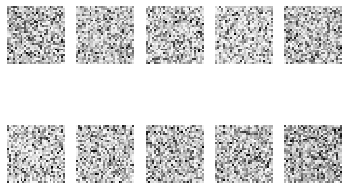

317 [D loss: 0.703784, acc.: 48.44%] [G loss: 1.026055]
318 [D loss: 0.717628, acc.: 50.00%] [G loss: 1.145168]


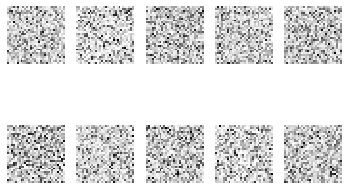

319 [D loss: 0.712331, acc.: 40.62%] [G loss: 0.814663]
320 [D loss: 0.729465, acc.: 50.00%] [G loss: 0.892740]


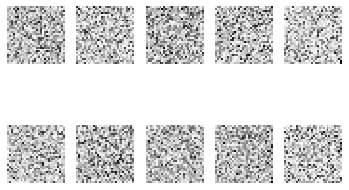

321 [D loss: 0.697256, acc.: 57.81%] [G loss: 1.050156]
322 [D loss: 0.657156, acc.: 59.38%] [G loss: 1.014072]


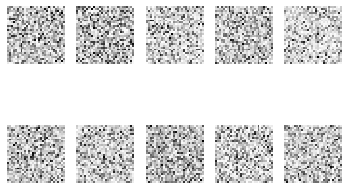

323 [D loss: 0.708447, acc.: 51.56%] [G loss: 1.122040]
324 [D loss: 0.754643, acc.: 39.06%] [G loss: 0.915268]


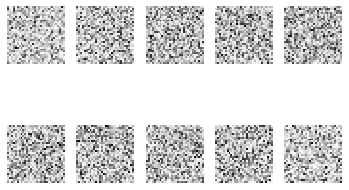

325 [D loss: 0.651891, acc.: 56.25%] [G loss: 0.930965]
326 [D loss: 0.715205, acc.: 48.44%] [G loss: 1.094474]


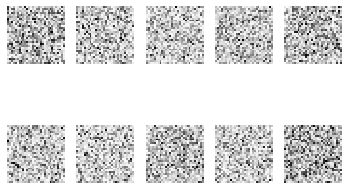

327 [D loss: 0.689510, acc.: 54.69%] [G loss: 1.118279]
328 [D loss: 0.680698, acc.: 56.25%] [G loss: 0.979350]


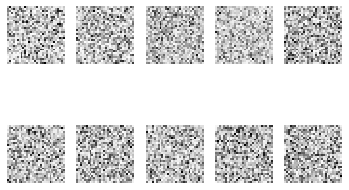

329 [D loss: 0.742437, acc.: 37.50%] [G loss: 0.831134]
330 [D loss: 0.662212, acc.: 62.50%] [G loss: 0.826084]


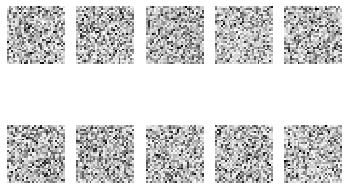

331 [D loss: 0.694127, acc.: 56.25%] [G loss: 0.963185]
332 [D loss: 0.718087, acc.: 50.00%] [G loss: 0.997441]


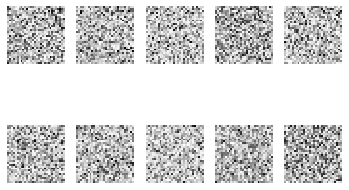

333 [D loss: 0.747209, acc.: 42.19%] [G loss: 0.835222]
334 [D loss: 0.723522, acc.: 42.19%] [G loss: 0.831389]


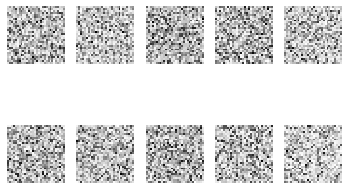

335 [D loss: 0.709479, acc.: 53.12%] [G loss: 0.953009]
336 [D loss: 0.713521, acc.: 54.69%] [G loss: 0.944402]


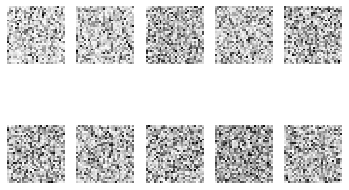

337 [D loss: 0.656846, acc.: 65.62%] [G loss: 1.073323]
338 [D loss: 0.709636, acc.: 54.69%] [G loss: 0.914060]


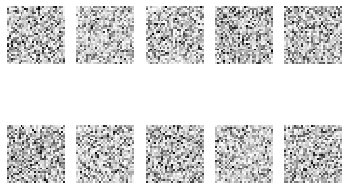

339 [D loss: 0.705355, acc.: 45.31%] [G loss: 0.837788]
340 [D loss: 0.710494, acc.: 54.69%] [G loss: 0.875703]


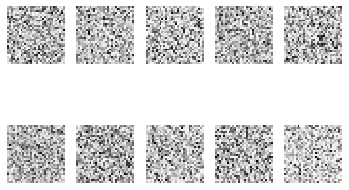

341 [D loss: 0.676346, acc.: 54.69%] [G loss: 0.897915]
342 [D loss: 0.731393, acc.: 35.94%] [G loss: 0.752702]


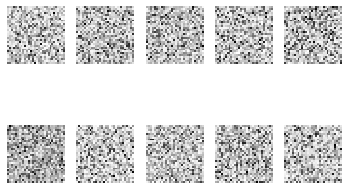

343 [D loss: 0.671888, acc.: 62.50%] [G loss: 0.857855]
344 [D loss: 0.725160, acc.: 46.88%] [G loss: 0.972427]


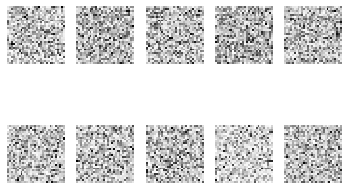

345 [D loss: 0.704898, acc.: 46.88%] [G loss: 0.891650]
346 [D loss: 0.760188, acc.: 39.06%] [G loss: 0.825147]


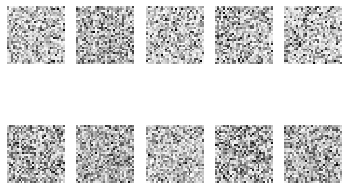

347 [D loss: 0.728263, acc.: 45.31%] [G loss: 0.892825]
348 [D loss: 0.704797, acc.: 50.00%] [G loss: 0.848930]


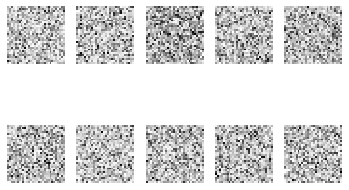

349 [D loss: 0.692969, acc.: 57.81%] [G loss: 0.777514]
350 [D loss: 0.738815, acc.: 35.94%] [G loss: 0.928906]


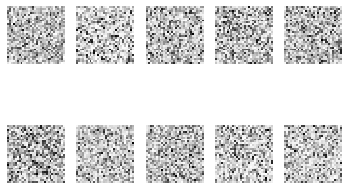

351 [D loss: 0.708639, acc.: 50.00%] [G loss: 0.917556]
352 [D loss: 0.684221, acc.: 50.00%] [G loss: 0.898746]


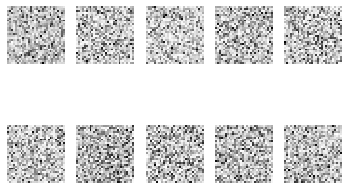

353 [D loss: 0.686147, acc.: 54.69%] [G loss: 0.973702]
354 [D loss: 0.722485, acc.: 46.88%] [G loss: 0.856877]


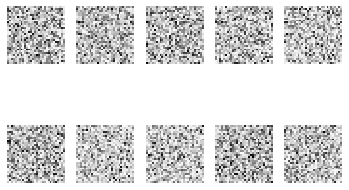

355 [D loss: 0.757419, acc.: 35.94%] [G loss: 0.746323]
356 [D loss: 0.676593, acc.: 56.25%] [G loss: 0.953837]


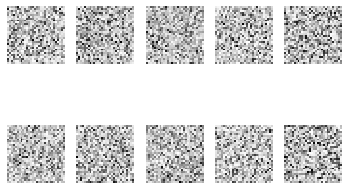

357 [D loss: 0.708383, acc.: 48.44%] [G loss: 0.883862]
358 [D loss: 0.724924, acc.: 48.44%] [G loss: 0.787618]


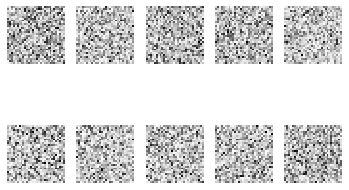

359 [D loss: 0.689902, acc.: 51.56%] [G loss: 0.808054]
360 [D loss: 0.781517, acc.: 29.69%] [G loss: 0.797288]


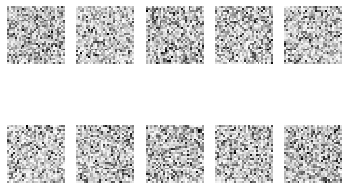

361 [D loss: 0.682252, acc.: 50.00%] [G loss: 0.777617]
362 [D loss: 0.698690, acc.: 51.56%] [G loss: 0.807859]


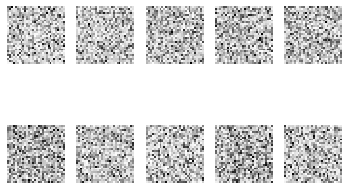

363 [D loss: 0.705698, acc.: 46.88%] [G loss: 0.882462]
364 [D loss: 0.699223, acc.: 46.88%] [G loss: 0.867024]


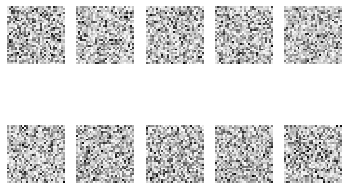

365 [D loss: 0.720247, acc.: 46.88%] [G loss: 0.813693]
366 [D loss: 0.693381, acc.: 54.69%] [G loss: 0.832051]


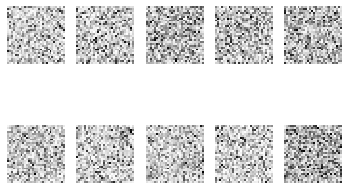

367 [D loss: 0.732527, acc.: 50.00%] [G loss: 0.831477]
368 [D loss: 0.674320, acc.: 65.62%] [G loss: 0.889895]


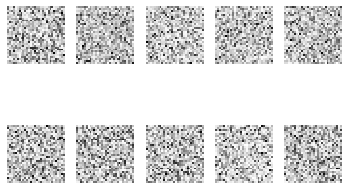

369 [D loss: 0.735441, acc.: 37.50%] [G loss: 0.833750]
370 [D loss: 0.725923, acc.: 43.75%] [G loss: 0.766021]


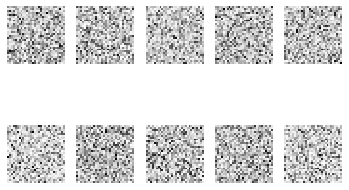

371 [D loss: 0.707744, acc.: 45.31%] [G loss: 0.749359]
372 [D loss: 0.728939, acc.: 51.56%] [G loss: 0.743591]


In [0]:
cgan = CGAN()
cgan.train(epochs=20000, batch_size=32, sample_interval=2)

In [0]:
X_train

array([[0.85696027, 0.8150514 , 0.59678746, ..., 0.26465929, 0.9194006 ,
        0.19717401],
       [0.96995564, 0.9006284 , 0.86494586, ..., 0.76007375, 0.40234438,
        0.011304  ],
       [0.50394701, 0.63856433, 0.5547267 , ..., 0.34694277, 0.05748735,
        0.81305771],
       ...,
       [0.27451551, 0.43137526, 0.91221722, ..., 0.88246199, 0.02039237,
        0.40259815],
       [0.24792821, 0.05914812, 0.84529188, ..., 0.98581661, 0.40163415,
        0.87096454],
       [0.81118018, 0.61405013, 0.6099047 , ..., 0.9559261 , 0.10549656,
        0.92431915]])

In [0]:
X_train = np.random.random((3000, 1263))
y_train = np.random.random((3000, 4))